In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
import sklearn
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
data2 = pd.read_csv("/Users/rjmac/Desktop/h1b_kaggle.csv",encoding = "ISO-8859-1", header=None, names=["ID","EMPLOYER_NAME","SOC_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","WORKSITE","lon","lat","CASE_STATUS"])
data2.head()

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_STATUS
0,NaN,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_STATUS
1,1.0,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256,CERTIFIED-WITHDRAWN
2,2.0,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431,CERTIFIED-WITHDRAWN
3,3.0,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575,CERTIFIED-WITHDRAWN
4,4.0,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.990251,39.7392358,CERTIFIED-WITHDRAWN


In [3]:
data2 = data2.dropna()
data2 = data2.iloc[:,1:]
data2.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_STATUS
1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.7430378,42.2808256,CERTIFIED-WITHDRAWN
2,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.6988856,33.0198431,CERTIFIED-WITHDRAWN
3,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.0776417,40.7281575,CERTIFIED-WITHDRAWN
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.990251,39.7392358,CERTIFIED-WITHDRAWN
5,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.1994042,38.6270025,WITHDRAWN


In [4]:
data2['EMPLOYER_NAME'] = data2['EMPLOYER_NAME'].astype('category')
data2['SOC_NAME'] = data2['SOC_NAME'].astype('category')
data2['JOB_TITLE'] = data2['JOB_TITLE'].astype('category')
data2['FULL_TIME_POSITION'] = data2['FULL_TIME_POSITION'].astype('category')
data2['WORKSITE'] = data2['WORKSITE'].astype('category')
data2['CASE_STATUS'] = data2['CASE_STATUS'].astype('category')
data2['PREVAILING_WAGE'] = data2['PREVAILING_WAGE'].astype('float')
data2['lon'] = data2['lon'].astype('float')
data2['lat'] = data2['lat'].astype('float')
data2['YEAR'] = data2['YEAR'].astype('float')

In [5]:
data2.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_STATUS
1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,CERTIFIED-WITHDRAWN
2,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,CERTIFIED-WITHDRAWN
3,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,CERTIFIED-WITHDRAWN
4,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,CERTIFIED-WITHDRAWN
5,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,WITHDRAWN


In [6]:
category_columns = data2.select_dtypes(['category']).columns
category_columns

Index(['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION',
       'WORKSITE', 'CASE_STATUS'],
      dtype='object')

In [7]:
data2[category_columns] = data2[category_columns].apply(lambda x: x.cat.codes)

In [8]:
data2.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_STATUS
1,85895,89,64961,0,36067.0,2016.0,57,-83.743038,42.280826,1
2,33862,142,17401,1,242674.0,2016.0,1757,-96.698886,33.019843,1
3,63687,142,17420,1,193066.0,2016.0,1025,-74.077642,40.728158,1
4,31840,142,74859,1,220314.0,2016.0,532,-104.990251,39.739236,1
5,61730,142,65535,1,157518.4,2016.0,2115,-90.199404,38.627003,3


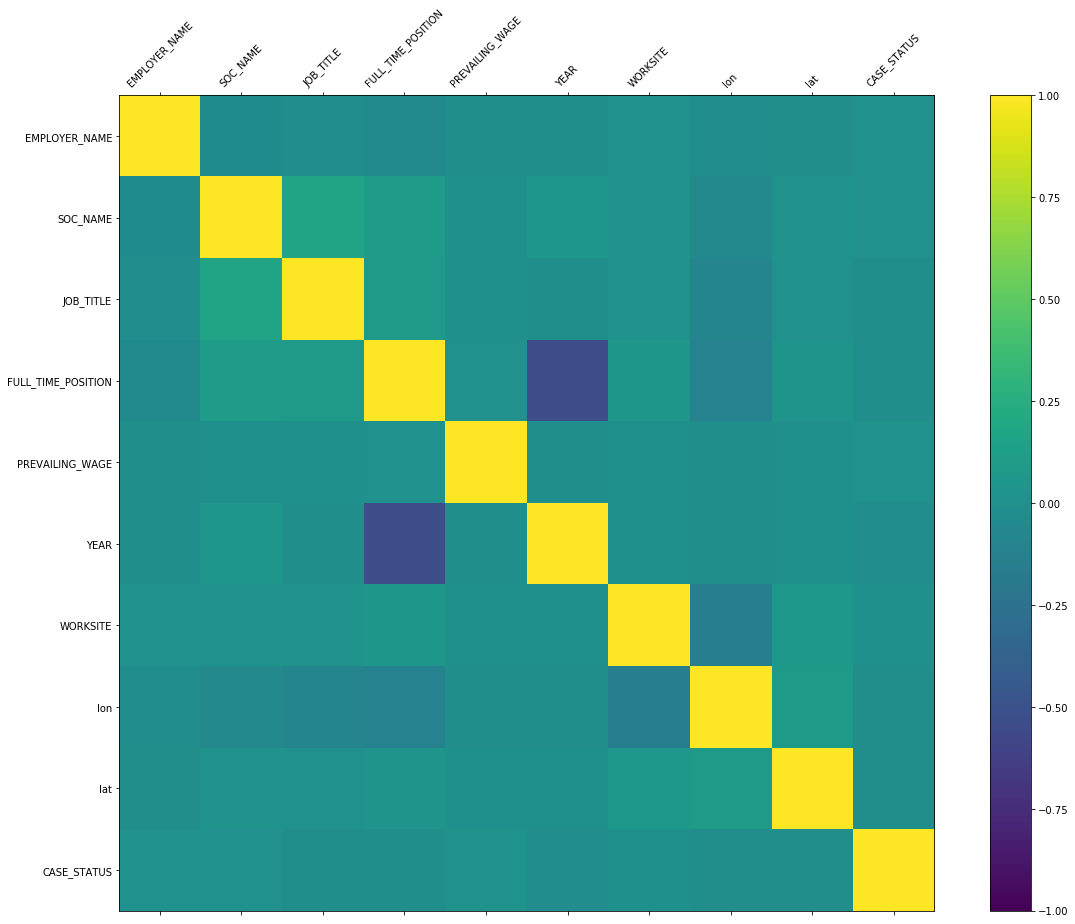

In [9]:
data2 = data2.astype('float')
column_names = ["EMPLOYER_NAME","SOC_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","WORKSITE","lon","lat","CASE_STATUS"]
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(data2.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(column_names, rotation = 45)
ax.set_yticklabels(column_names)
plt.show()

In [10]:
training_features = ["EMPLOYER_NAME","SOC_NAME","JOB_TITLE","FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","WORKSITE","lon","lat"]
target = "CASE_STATUS"
train_x, test_x, train_y, test_y = train_test_split(data2[training_features], data2[target], train_size=0.7)
train_x.shape

(713283, 9)

In [11]:
clf = LogisticRegression()
clf.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score
train_pred = clf.predict(train_x)
accuracy_score(train_y,train_pred)*100

87.264802329510175

In [13]:
#clf.fit(test_x, test_y)
test_pred = clf.predict(test_x)
accuracy_score(test_y,test_pred)*100

87.333697533146008